# Import Lib

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\Resume Categorization\\data\\ResumeDataSet.csv")

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [6]:
df.dtypes

Category    object
Resume      object
dtype: object

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [8]:
df['Resume'].value_counts()

Resume
Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details \r\nJanuary 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering\r\nOctober 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board\r\n    College Magazine OCEAN\r\nWeb Designer \r\n\r\nWeb Designer - Trust Systems and Software\r\nSkill Details \r\nPHOTOSHOP- Exprience - 28 months\r\nBOOTSTRAP- Exprience - 6 months\r\nHTML5- Exprience - 6 months\r\nJAVASCRIPT- Exprience - 6 months\r\nCSS3- Exprience - Less than 1 year months\r\nAngular 4- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Trust Systems and Software\r\ndescription - Projects worked on:\r\n1. TrustBank-CBS\r\nProject Description: TrustBank-CBS is a core banking solution by Trust Systems.\r\nRoles and Responsibility:\r\nâ Renovated complete UI to make it more modern, user-friendly, ma

# Data Visualization

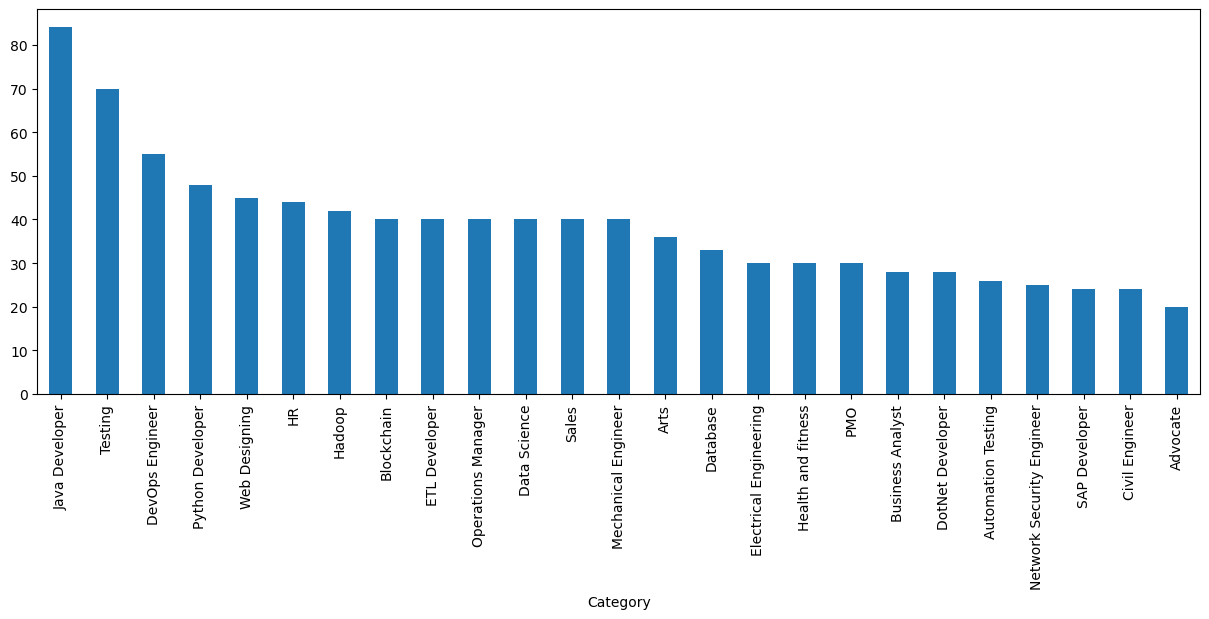

In [9]:
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind="bar")
plt.show()

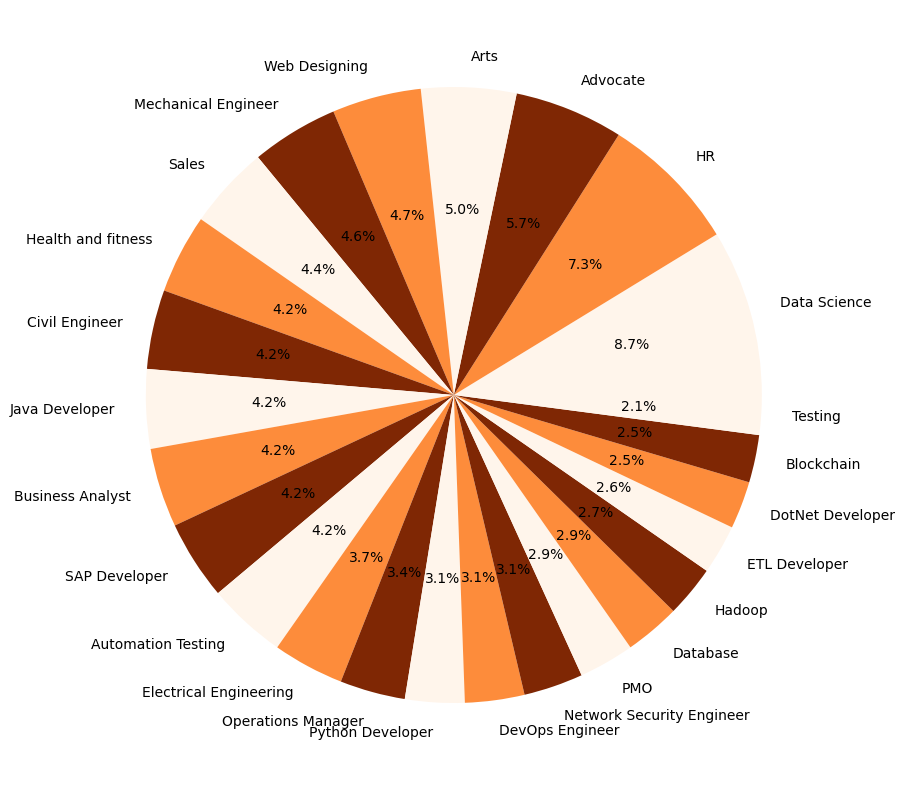

In [10]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

In [11]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

Remove url,email,special characters,stop words

In [12]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text  = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text

<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\DELL\AppData\Local\Temp\ipykernel_13808\1183568317.py:7: SyntaxWarning: invalid escape sequence '\w'
  clean_text = re.sub('[^\w\s]', '', clean_text)


In [13]:
import nltk
nltk.download('stopwords')
df['Resume'] = df['Resume'].apply(lambda x:clean(x))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

# Encoding

In [15]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [17]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [18]:
X_train , X_test, y_train , y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)


In [19]:
X_train.shape

(769, 8017)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuarcy of the KNN Classifier on test data-> : {accuracy}")

Accuarcy of the KNN Classifier on test data-> : 0.9844559585492227


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [22]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier()) 
}

In [23]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuarcy of {model_name} on test data: {accuracy}")

Accuarcy of KNeighborsClassifier on test data: 0.9844559585492227
Accuarcy of LogisticRegression on test data: 0.9948186528497409
Accuarcy of RandomForestClassifier on test data: 0.9844559585492227
Accuarcy of SVC on test data: 0.9948186528497409
Accuarcy of MultinomialNB on test data: 0.9792746113989638
Accuarcy of OneVsRestClassifier on test data: 0.9844559585492227


In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [26]:
myresume1 = """ EDUCATION
 B.Tech, Computer Science & Engineering
 MIT World Peace University
 TRAININGS / CERTIFICATIONS
 Introduction To Large Language Models
 Jun 2024
 Coursera, Virtual
 Machine Learning With Python
 Mar 2023
 Coursera, Virtual
 PORTFOLIO
 GitHub link ↗
 Portfolio link ↗
 PROJECTS
 Brain Tumor Detection ↗ 
Aug 2024 - Oct 2024
 Brain tumors present a formidable challenge in healthcare due to
 their complexity and the critical importance of early and accurate
 detection. Traditional imaging techniques like magnetic
 resonance imaging (MRI) and computed tomography (CT) scans
 have been the cornerstone of diagnosis. However, the
 subjectivity in human interpretation of these images can lead to
 variability in diagnosis. Deep learning, a branch of artificial
 intelligence (AI), offers significant potential to enhance the
 accuracy and consistency of brain tumor detection. This article
 explores the application of VGG19, a popular deep learning
 model, in detecting brain tumors.
 2021 - 2026
 What Is Data Science
 Apr 2023
 Coursera, Virtual
 Python For Data Science, AI & Development
 Feb 2023
 Coursera, Virtual
 Nut Bolt Classification ↗ 
Jan 2023 - Aug 2024
 The "NutBoltClassifier" system represents a significant leap
 forward in automated fastener classification, harnessing deep
 learning and computer vision techniques.
 Page - 1/2
J.A.R ↗ 
Self Driving Car ↗ 
Jan 2024 - Jul 2024
 JAR represents a paradigm shift in desktop interaction,
 optimizing task execution and productivity through its seamless
 integration of voice and text inputs. With sophisticated
 processing algorithms, intuitive interface, and customizable
 settings, it streamlines workflows and enhances user experience.
 Speech Emotion Recognition ↗ 
Jan 2024 - Jun 2024
 Our machine learning model tries to detect and predict various
 emotion in speech signal or human audio by detecting different
 features and component of speech affected by human emotion.
 Emotion detection from the speech is a relatively new field of
 research.
 SKILLS
 • Python
 • Database Management System (DBMS)
 • Data Science
 • Artificial Intelligence
 • Natural Language Processing (NLP)
 • SQL
 • MongoDB
 • Data Structures
 • Machine Learning
 • Algorithms
 Jan 2024 - Jul 2024
 Empirical research demonstrated that CNNs can independently
 learn lane and road following tasks without manual
 decomposition, achieving proficiency with under 100 hours of
 diverse driving data. The CNN successfully identified road
 features from steering inputs alone, even without explicit labels.
 This work highlights CNNs' potential to reduce reliance on
 manually engineered rules, paving the way for more efficient,
 data-driven training for autonomous driving systems.
 • NoSQL
 • Data Analysis
 • Neural Networks
 • Deep Learning
 • Docker."""

In [27]:
cleaned_resume = clean(myresume1)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is-> ", category_name)

Predicted Category is->  Data Science


In [28]:
myresume2="""EDUCATION 
Course 
Institution/College 
Score 
X 
St. Joseph's Convent Senior Secondary School, Ratlam 
Year 
XII 
85.33% 
St. Stephen's School, Ratlam 
2019 
B.Tech C.S. 
85.80% 
Dr.Vishwanath Karad MIT World Peace University,Pune 
2021 
8.45 CGPA 
PROJECT EXPERIENCE 
2025 
Brain MRI Classification | TensorFlow, Keras, OpenCV, Deep Learning                                                
• Achieved a high accuracy of 99.7%. 
• Addressed challenges in model optimization through transfer learning. 
July 2024 – Nov 2024 
• Analyzed model performance to fine-tune hyperparameters and maximize classification accuracy. 
Real-Time Speech to Emotion Recognition | Librosa, TensorFlow, NLP, Artificial Intelligence             
Jan 2024 - Mar 2024 
• Model Design and Implementation. 
• Improved Model Performance. 
• Real-Time Audio Validation. 
Property Price Prediction | Python, Pandas, NumPy, Matplotlib, Machine Learning                               
• Implemented Data Preprocessing Pipeline. 
• Outlier Detection and Removal. 
• Enhanced Data Integrity and Consistency. 
• Model-Ready Data Preparation. 
Online Movie Ticket Booking System | SQL, PHP, HTML, CSS, JavaScript, Bootstrap                         
• Enhanced Customer Experience. 
• Streamlined Booking Process. 
Library Management System | Java, File Handling,  AWT,  Scanner, OOP                              
• Developed an interactive console-based inventory system. 
• Dynamic Inventory Updates. 
• Transaction Summary & Receipt Generation. 
EXPERIENCE & AWARDS 
Sept 2023 - Oct 2023 
May 2023 - Aug 2023 
Mar 2023 - May 2023  
Researched at Texas A&M University 
Awarded 2nd at Texas A&M University 
Presented at 8th ICCUBEA  
TECHNICAL SKILLS 
Texarkana, Texas 
Texarkana, Texas 
Pune, Maharashtra 
Languages: Java, Python, C,  MySQL, HTML, CSS 
Frameworks/Libraries: Pandas, NumPy, Matplotlib, TensorFlow, Keras, Librosa   
Developer Tools:Github, VSCode, WireShark, SolidWorks, TinkerCad, PacketTracer, PyCharm
"""

In [29]:
cleaned_resume = clean(myresume2)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is-> ", category_name)

Predicted Category is->  Data Science


In [30]:
import pickle
pickle.dump(tfidf, open('model/tfidf.pkl', 'wb'))
pickle.dump(model, open('model/model.pkl', 'wb'))